In [49]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Read the data
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert/new_data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert/new_data'
]
file = 'merged_data.csv'
path = next((f'{path}/{file}' for path in possible_paths if os.path.exists(f'{path}/{file}')), None)
pd.set_option('display.max_columns', None) # show all columns
data = pd.read_csv(path)
data.head()

,USUBJID,AGE,SEX,RACE,CONTINENT,CESEV,CECONTRT,TOTRELAP,MHCONTRT,MHDIAGN,CARDIO,URINARY,MUSCKELET,FATIGUE,SMSTDY,NRELAP,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-2y,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after,DS,DS_L,DS_R,SLEC_before,SLEC_after,SES_after,SES_before,VAA,BDI-before,BDI-after,EDSS-before,EDSS-2y,EDSS-after_2y,KFSS1-Sensory-2y,KFSS1-Sensory-after_2y,KFSS1-Sensory-before,KFSS1-Brain-2y,KFSS1-Brain-after_2y,KFSS1-Brain-before,KFSS1-Bowel-2y,KFSS1-Bowel-after_2y,KFSS1-Bowel-before,KFSS1-Pyramidal-2y,KFSS1-Pyramidal-after_2y,KFSS1-Pyramidal-before,KFSS1-Cerebral-2y,KFSS1-Cerebral-after_2y,KFSS1-Cerebral-before,KFSS1-Visual-2y,KFSS1-Visual-after_2y,KFSS1-Visual-before,KFSS1-Cerebellar-2y,KFSS1-Cerebellar-after_2y,KFSS1-Cerebellar-before,KFSS_M-2y,KFSS_M-after_2y,KFSS_M-before,KFSS_P-2y,KFSS_P-after_2y,KFSS_P-before,M_R36-SF12-before,P_R36-SF12-before,R36-SF12-before_Ind,M_R36-SF12-after,P_R36-SF12-after,R36-SF12-after_Ind
0,MSOAC/0649,NaN,F,WHITE,NORTH AMERICA,NaN,NaN,NaN,Y,SPMS,0,1,0,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.35,10.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC/2224,38.0,F,WHITE,EUROPE,NaN,NaN,NaN,NaN,RRMS,0,1,0,0,NaN,0.0,27.80,26.55,NaN,NaN,NaN,NaN,55.0,56.0,NaN,38.0,42.0,8.90,8.85,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,30.0,30.0,1.25,1.25,NaN,0.380952,0.388889,3.00,3.0,NaN,0.000000,NaN,0.000000,0.2,NaN,0.2,0.000000,NaN,0.000000,0.5,NaN,0.500000,0.0,NaN,0.0,0.000000,NaN,0.0,0.0,NaN,0.0,0.148148,NaN,0.148148,0.000000,NaN,0.000000,0.733333,0.653846,0.0,0.566667,0.576923,0.0
2,MSOAC/0576,50.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,0,1,NaN,0.0,17.75,18.65,17.90,51.0,56.5,56.5,59.0,59.0,59.5,NaN,NaN,4.55,4.70,5.15,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.75,4.0,4.25,0.333333,0.250000,0.333333,0.0,0.0,0.1,0.250000,0.166667,0.333333,0.5,0.500000,0.500000,0.0,0.2,0.0,0.083333,0.083333,0.0,0.4,0.4,0.3,0.240741,0.277778,0.259259,0.166667,0.125000,0.166667,0.771429,0.784810,1.0,0.714286,0.670886,1.0
3,MSOAC/4961,44.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,0,1,1,1,NaN,0.0,19.75,19.45,20.60,38.5,52.0,54.0,55.5,59.0,58.0,NaN,NaN,4.00,4.90,5.60,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50,3.5,3.50,0.333333,0.250000,0.333333,0.0,0.1,0.0,0.166667,0.250000,0.250000,0.5,0.500000,0.416667,0.0,0.2,0.0,0.000000,0.000000,0.0,0.2,0.3,0.3,0.185185,0.277778,0.222222,0.083333,0.125000,0.125000,0.671429,0.746835,1.0,0.628571,0.658228,1.0
4,MSOAC/5990,52.0,F,WHITE,NaN,NaN,NaN,NaN,Y,PPMS,1,1,0,1,NaN,0.0,21.45,21.35,22.75,22.0,23.5,22.0,35.0,41.5,44.0,NaN,NaN,11.40,16.80,30.20,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,6.0,6.50,0.166667,0.333333,0.166667,0.2,0.2,0.2,0.166667,0.166667,0.166667,0.5,0.666667,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.4,0.0,0.222222,0.333333,0.185185,0.083333,0.166667,0.083333,0.714286,0.493671,1.0,0.685714,0.556962,1.0


In [51]:
input_columns = ['AGE', 'SEX', 'RACE', 'CONTINENT', 'CECONTRT', 'MHCONTRT', 'MHDIAGN', 'CARDIO', 'URINARY', 'MUSCKELET', 'FATIGUE',
                  'NHPT-before', 'PASAT_2s-before', 'PASAT_3s-before', 'SDMT-before', 'T25FW-before', 'T-before', 'P-before', 
                  'N-before', 'SLEC_before', 'SES_before', 'BDI-before', 'EDSS-before', 'KFSS_M-before', 'KFSS_P-before', 
                  'M_R36-SF12-before', 'P_R36-SF12-before', 'R36-SF12-before_Ind']

# FOR NOW I INCLUDED ALL OUTPUTS BUT WE WONT END UP USING ALL PROBABLY 
output_columns = ['CESEV', 'TOTRELAP', 'SMSTDY', 'NRELAP', 'NHPT-2y', 'NHPT-after_2y', 'PASAT_2s-2y', 'PASAT_2s-after_2y', 
                  'PASAT_3s-2y', 'PASAT_3s-after_2y', 'SDMT-2y', 'T25FW-2y', 'T25FW-after_2y', 'T-after', 'P-after', 'N-after',
                  'SLEC_after', 'SES_after', 'VAA', 'BDI-after', 'EDSS-2y', 'EDSS-after_2y', 'KFSS_M-2y', 'KFSS_M-after_2y', 
                  'KFSS_P-2y', 'KFSS_P-after_2y', 'M_R36-SF12-after', 'P_R36-SF12-after', 'R36-SF12-after_Ind']

inputs = data[input_columns]
outputs = data[output_columns]

In [52]:
# Compute the percentage of missing values for each column
missing_percentage = (inputs.isnull().sum() / len(inputs)) * 100

# Round the percentage to 2 decimal places
missing_percentage = missing_percentage.round(2)

# Create a dataframe to store the results
missing_inputs = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Sort the dataframe by missing percentage in descending order
missing_inputs = missing_inputs.sort_values(by='Missing Percentage', ascending=False)
missing_inputs

,Column,Missing Percentage
5,MHCONTRT,88.24
4,CECONTRT,82.80
14,SDMT-before,79.76
21,BDI-before,72.58
12,PASAT_2s-before,68.60
19,SLEC_before,67.95
20,SES_before,67.91
18,N-before,58.54
3,CONTINENT,56.27
24,KFSS_P-before,46.57


In [53]:
# Compute the percentage of missing values for each column
missing_percentage = (outputs.isnull().sum() / len(inputs)) * 100

# Round the percentage to 2 decimal places
missing_percentage = missing_percentage.round(2)

# Create a dataframe to store the results
missing_outputs = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Sort the dataframe by missing percentage in descending order
missing_outputs = missing_outputs.sort_values(by='Missing Percentage', ascending=False)
missing_outputs

,Column,Missing Percentage
7,PASAT_2s-after_2y,85.92
10,SDMT-2y,79.88
25,KFSS_P-after_2y,78.50
23,KFSS_M-after_2y,78.50
12,T25FW-after_2y,75.17
9,PASAT_3s-after_2y,73.87
5,NHPT-after_2y,73.79
21,EDSS-after_2y,73.75
19,BDI-after,72.33
6,PASAT_2s-2y,68.76


Questions
- CECONTRT & MHCONTRT: input or output? put as input for now -- also what is the difference between both? MIGHT DROP LATER BC MANY MISSING VALUE
- TOTRELAP vs NRELAP --> which one do we use as output? cuz i dont think we can use both, they are way too correlated (unless we predict both as outcomes but i dont see the value of that?)
- for now ignored DS
- VAA: not sure if it's an output, time wasnt recorded for it so dont know if we can use as input
- KFSS the separate components didn't put yet for now cuz idk if we can include BOTH separate as well as total (think we have to choose 1 of the two approaches to include but not sure)

**choose 10 or so final outputs that we'll end up using** 

### Find the information for the big table in Overleaf

In [54]:
# Calculate descriptive statistics for numeric columns
numeric_stats = round(outputs.describe(), 1)

# Add missing values percentage
missing_percentage = outputs.isnull().mean() * 100
numeric_stats.loc['Missing %'] = round(missing_percentage, 1)

numeric_stats = numeric_stats.T
numeric_stats.sort_values(by='Missing %', ascending=False)
numeric_stats

,count,mean,std,min,25%,50%,75%,max,Missing %
TOTRELAP,1206.0,3.7,3.3,1.0,1.0,2.0,6.0,17.0,51.1
SMSTDY,836.0,267.5,237.2,1.0,82.8,203.0,375.2,1454.0,66.1
NRELAP,2465.0,0.6,1.1,0.0,0.0,0.0,1.0,9.0,0.0
NHPT-2y,1610.0,27.1,15.2,10.9,19.9,23.3,29.3,300.0,34.7
NHPT-after_2y,646.0,27.4,15.3,13.1,19.6,23.2,29.4,176.4,73.8
PASAT_2s-2y,770.0,38.3,12.7,3.0,28.5,39.0,48.5,60.0,68.8
PASAT_2s-after_2y,347.0,41.6,13.0,1.0,32.8,43.0,53.0,60.0,85.9
PASAT_3s-2y,1608.0,48.5,11.4,5.0,43.0,52.2,57.5,60.0,34.8
PASAT_3s-after_2y,644.0,51.3,10.5,11.0,48.0,55.5,59.0,60.0,73.9
SDMT-2y,496.0,49.2,15.7,0.0,39.0,50.0,59.0,110.0,79.9


T, P, N-after & VAA should be put with the categorical ones I think? (binary)

In [55]:
# Filter categorical columns
categorical_columns = ['CESEV', 'T-after', 'P-after', 'N-after', 'VAA', 'R36-SF12-after_Ind', 'NRELAP']

# Initialize an empty list to store the results
categorical_stats = []

# Loop through each categorical column
for column in categorical_columns:
    # Count non-missing values
    non_missing_count = outputs[column].count()
    
    # Calculate percentage of missing values
    missing_percentage = (1 - non_missing_count / len(outputs)) * 100
    
    # Calculate mode (most frequent value)
    mode_value = outputs[column].mode().iloc[0]
    
    # Append the statistics to the list
    categorical_stats.append({
        'Column': column,
        'Count': non_missing_count,
        '% Missing': missing_percentage,
        'Mode': mode_value
    })

# Create a DataFrame from the list of dictionaries
categorical_stats_df = pd.DataFrame(categorical_stats)
categorical_stats_df

,Column,Count,% Missing,Mode
0,CESEV,940,61.866126,MODERATE
1,T-after,1365,44.624746,0.0
2,P-after,1320,46.450304,0.0
3,N-after,1014,58.864097,0.0
4,VAA,773,68.640974,0.0
5,R36-SF12-after_Ind,1529,37.971602,1.0
6,NRELAP,2465,0.000000,0.0


In [56]:
dfs_per_column = {}

# Loop through each categorical column
for column in categorical_columns:
    # Create a DataFrame for the current column with unique values as rows
    unique_values_df = pd.DataFrame(outputs[column].value_counts(normalize=True)).reset_index()
    unique_values_df.columns = [column, 'Frequency Percentage']
    
    # Round the frequency percentage to one decimal place and multiply by 100
    unique_values_df['Frequency Percentage'] = (unique_values_df['Frequency Percentage'] * 100).round(1)
    
    # Add the DataFrame to the dictionary
    dfs_per_column[column] = unique_values_df

dfs_per_column['CESEV']

,CESEV,Frequency Percentage
0,MODERATE,56.8
1,MILD,25.3
2,SEVERE,17.9


In [57]:
dfs_per_column['T-after']

,T-after,Frequency Percentage
0,0.0,97.4
1,1.0,2.6


In [58]:
dfs_per_column['P-after']

,P-after,Frequency Percentage
0,0.0,97.8
1,1.0,2.2


In [59]:
dfs_per_column['N-after']

,N-after,Frequency Percentage
0,0.0,94.0
1,1.0,6.0


In [60]:
dfs_per_column['VAA']

,VAA,Frequency Percentage
0,0.0,76.6
1,1.0,23.4


In [61]:
dfs_per_column['R36-SF12-after_Ind']

,R36-SF12-after_Ind,Frequency Percentage
0,1.0,67.6
1,0.0,32.4


In [62]:
dfs_per_column['NRELAP']

,NRELAP,Frequency Percentage
0,0.0,65.4
1,1.0,19.7
2,2.0,8.6
3,3.0,3.3
4,4.0,1.6
5,5.0,0.9
6,6.0,0.4
7,7.0,0.1
8,9.0,0.0


### Correlation

**NOTE:** NRELAP is still a numeric outcome here (to be able to calculate correlation)
Is the negative correlation between RAND36 and EDSS expected? YES! higher EDSS = worse disability & lower RAND36 = worse disability (checked this bc wasn't sure)

In [63]:
object_columns = outputs.select_dtypes(include=['object'])
outputs = pd.get_dummies(outputs, columns=object_columns.columns, dtype=int)
outputs.head()

,TOTRELAP,SMSTDY,NRELAP,NHPT-2y,NHPT-after_2y,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-2y,T25FW-2y,T25FW-after_2y,T-after,P-after,N-after,SLEC_after,SES_after,VAA,BDI-after,EDSS-2y,EDSS-after_2y,KFSS_M-2y,KFSS_M-after_2y,KFSS_P-2y,KFSS_P-after_2y,M_R36-SF12-after,P_R36-SF12-after,R36-SF12-after_Ind,CESEV_MILD,CESEV_MODERATE,CESEV_SEVERE
0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,NaN,NaN,0.0,26.55,NaN,NaN,NaN,56.0,NaN,42.0,8.85,NaN,0.0,0.0,0.0,30.0,1.25,NaN,0.388889,3.0,NaN,0.148148,NaN,0.000000,NaN,0.566667,0.576923,0.0,0,0,0
2,NaN,NaN,0.0,18.65,17.90,56.5,56.5,59.0,59.5,NaN,4.70,5.15,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,4.25,0.240741,0.277778,0.166667,0.125000,0.714286,0.670886,1.0,0,0,0
3,NaN,NaN,0.0,19.45,20.60,52.0,54.0,59.0,58.0,NaN,4.90,5.60,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3.5,3.50,0.185185,0.277778,0.083333,0.125000,0.628571,0.658228,1.0,0,0,0
4,NaN,NaN,0.0,21.35,22.75,23.5,22.0,41.5,44.0,NaN,16.80,30.20,0.0,0.0,NaN,NaN,NaN,NaN,NaN,6.0,6.50,0.222222,0.333333,0.083333,0.166667,0.685714,0.556962,1.0,0,0,0


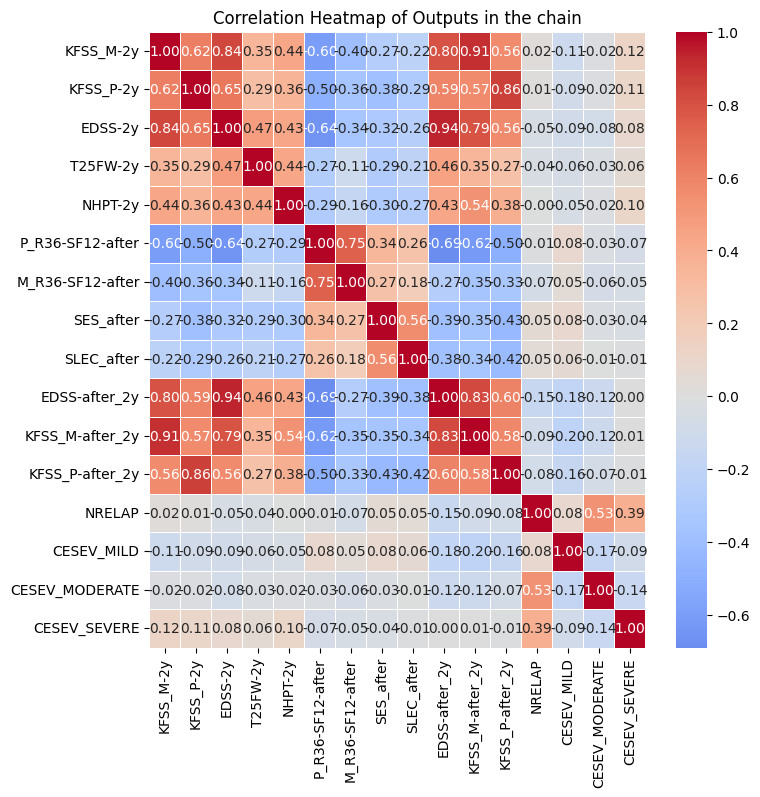

In [67]:
outputs_correlation = outputs[['KFSS_M-2y', 'KFSS_P-2y', 'EDSS-2y', 'T25FW-2y', 'NHPT-2y', 'P_R36-SF12-after', 'M_R36-SF12-after', 
                               'SES_after', 'SLEC_after', 'EDSS-after_2y', 'KFSS_M-after_2y', 'KFSS_P-after_2y',
                                'NRELAP', 'CESEV_MILD', 'CESEV_MODERATE', 'CESEV_SEVERE']]
correlation_matrix_outputs = outputs_correlation.corr()

# Create heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix_outputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap of Outputs in the chain')
plt.show()

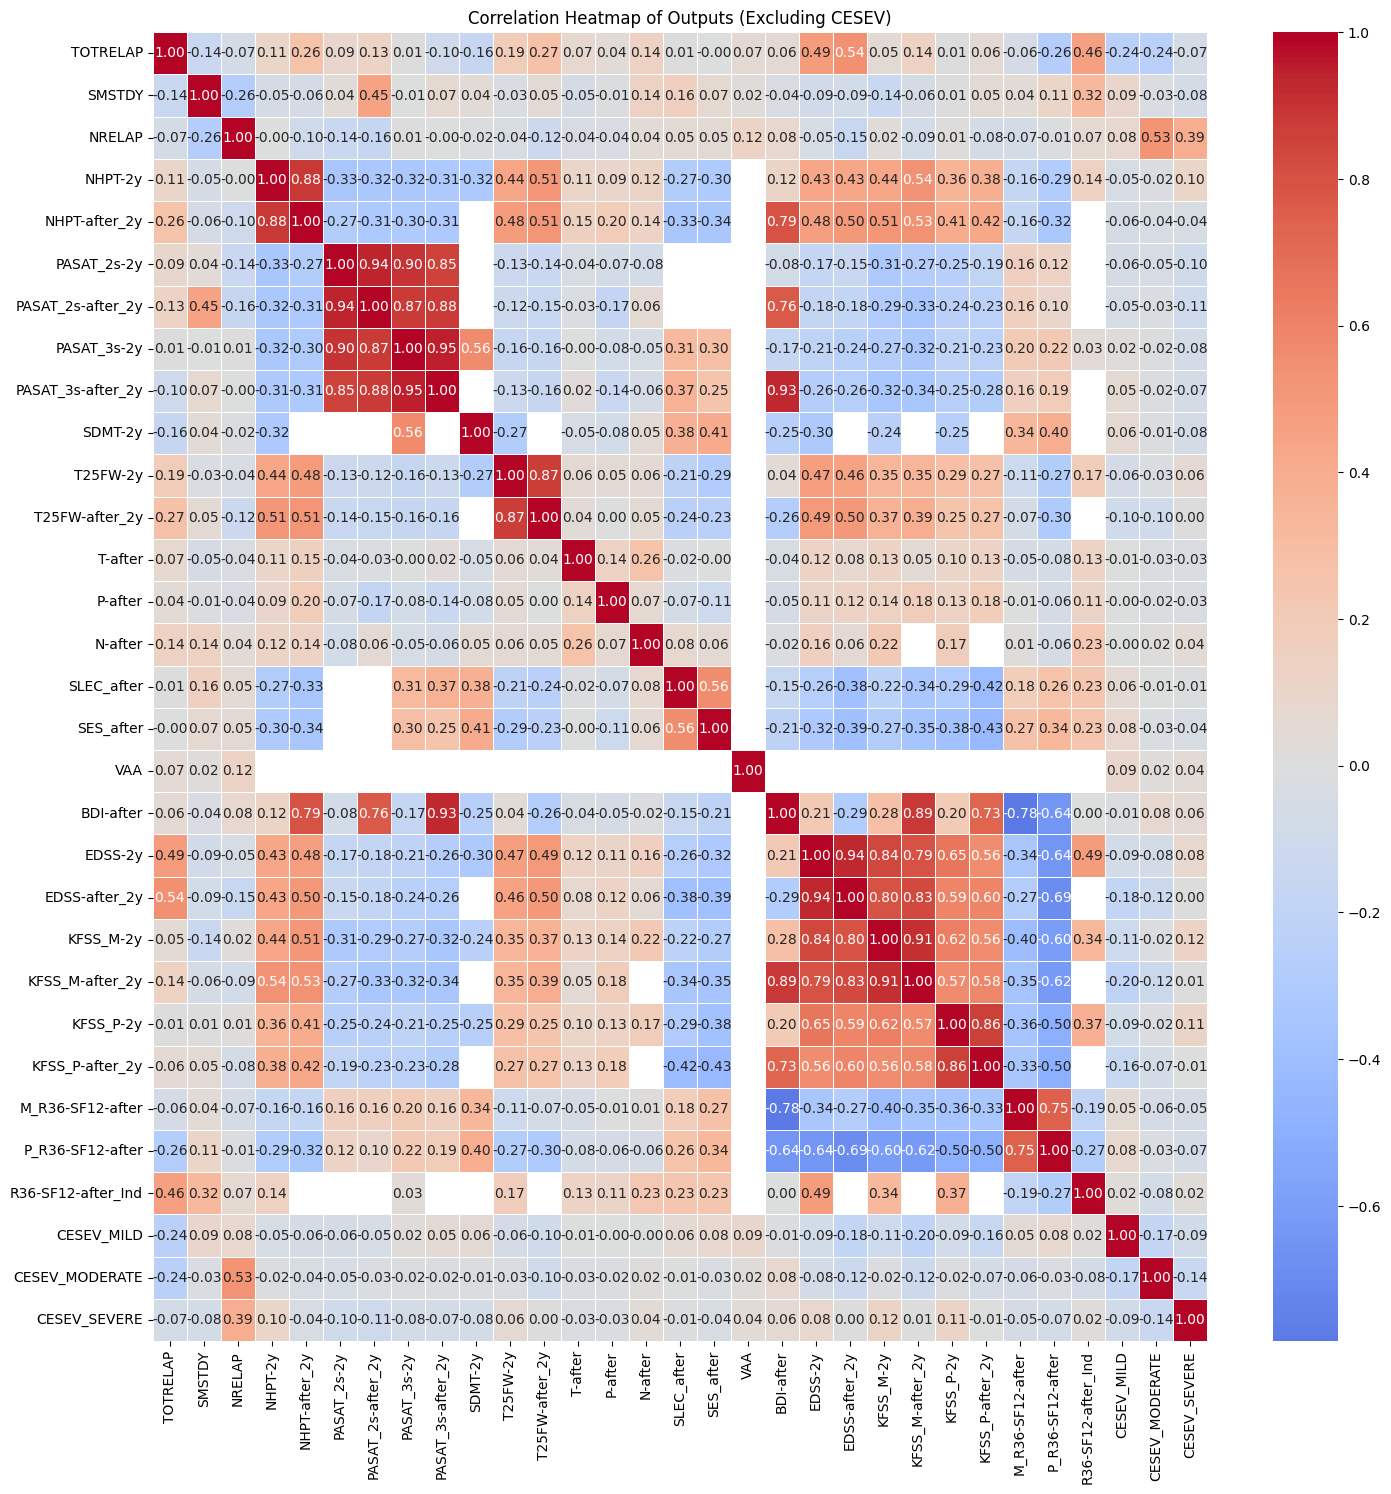

In [66]:
outputs_correlation = outputs
correlation_matrix_outputs = outputs_correlation.corr()

# Create heatmap
plt.figure(figsize=(17, 17))
sns.heatmap(correlation_matrix_outputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap of Outputs (Excluding CESEV)')
plt.show()

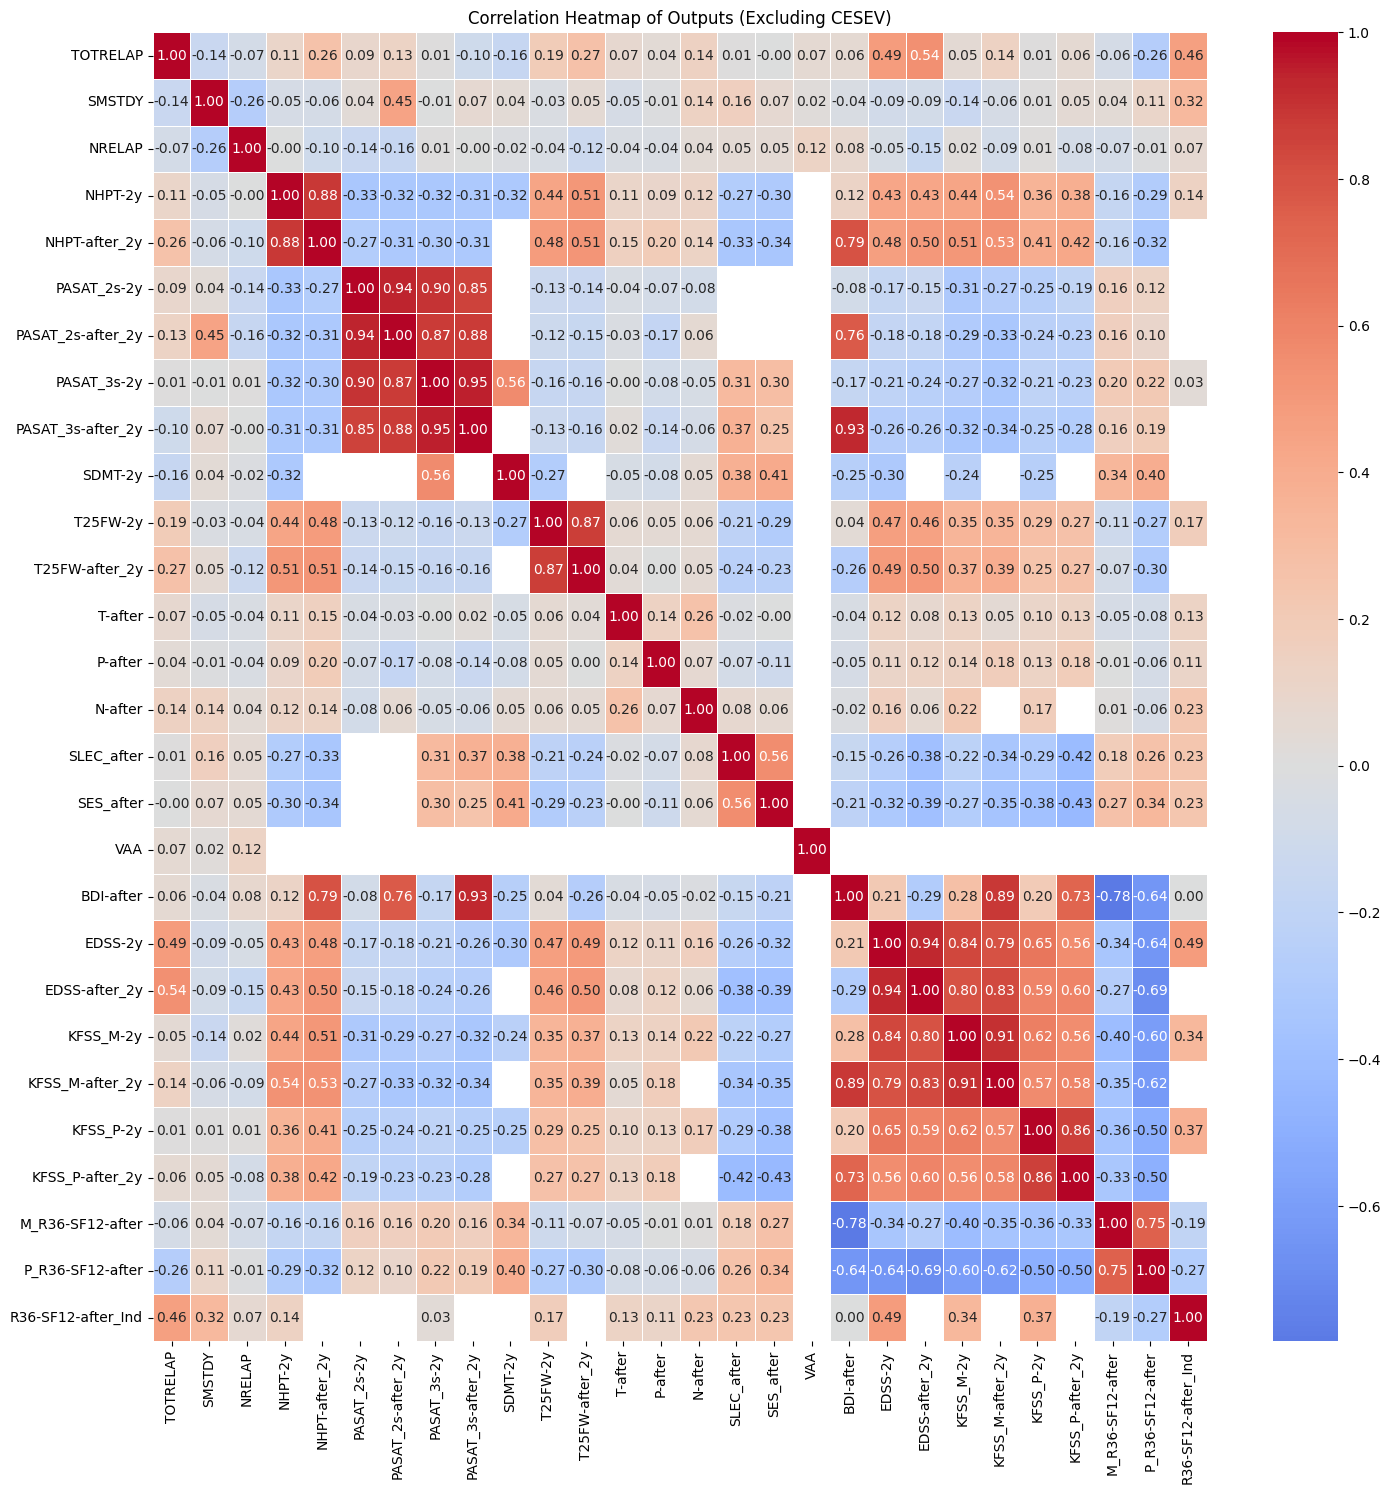

In [68]:
cols_to_drop = ['CESEV_MILD', 'CESEV_MODERATE', 'CESEV_SEVERE']
outputs_correlation = outputs.drop(cols_to_drop, axis=1)
correlation_matrix_outputs = outputs_correlation.corr()

# Create heatmap
plt.figure(figsize=(17, 17))
sns.heatmap(correlation_matrix_outputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap of Outputs (Excluding CESEV)')
plt.show()

In [69]:
object_columns = inputs.select_dtypes(include=['object'])
inputs = pd.get_dummies(inputs, columns=object_columns.columns, dtype=int)
inputs.head()

,AGE,CARDIO,URINARY,MUSCKELET,FATIGUE,NHPT-before,PASAT_2s-before,PASAT_3s-before,SDMT-before,T25FW-before,T-before,P-before,N-before,SLEC_before,SES_before,BDI-before,EDSS-before,KFSS_M-before,KFSS_P-before,M_R36-SF12-before,P_R36-SF12-before,R36-SF12-before_Ind,SEX_F,SEX_M,RACE_NON-WHITE,RACE_WHITE,CONTINENT_ASIA,CONTINENT_EURASIA,CONTINENT_EUROPE,CONTINENT_NORTH AMERICA,CONTINENT_OCEANIA,CONTINENT_SOUTH AMERICA,CECONTRT_N,CECONTRT_Y,MHCONTRT_N,MHCONTRT_Y,MHDIAGN_PPMS,MHDIAGN_RRMS,MHDIAGN_SPMS
0,NaN,0,1,0,1,NaN,NaN,NaN,NaN,11.35,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1,38.0,0,1,0,0,27.80,NaN,55.0,38.0,8.90,0.0,0.0,0.0,30.0,1.25,0.380952,3.00,0.148148,0.000000,0.733333,0.653846,0.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,50.0,0,1,0,1,17.75,51.0,59.0,NaN,4.55,0.0,0.0,NaN,NaN,NaN,NaN,3.75,0.259259,0.166667,0.771429,0.784810,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,44.0,0,1,1,1,19.75,38.5,55.5,NaN,4.00,0.0,0.0,NaN,NaN,NaN,NaN,3.50,0.222222,0.125000,0.671429,0.746835,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
4,52.0,1,1,0,1,21.45,22.0,35.0,NaN,11.40,0.0,0.0,NaN,NaN,NaN,NaN,6.00,0.185185,0.083333,0.714286,0.493671,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [70]:
# For binary ones, only keep one of the two because it's
inputs = inputs.drop(['SEX_M', 'RACE_NON-WHITE', 'CECONTRT_N', 'MHCONTRT_N'], axis=1)

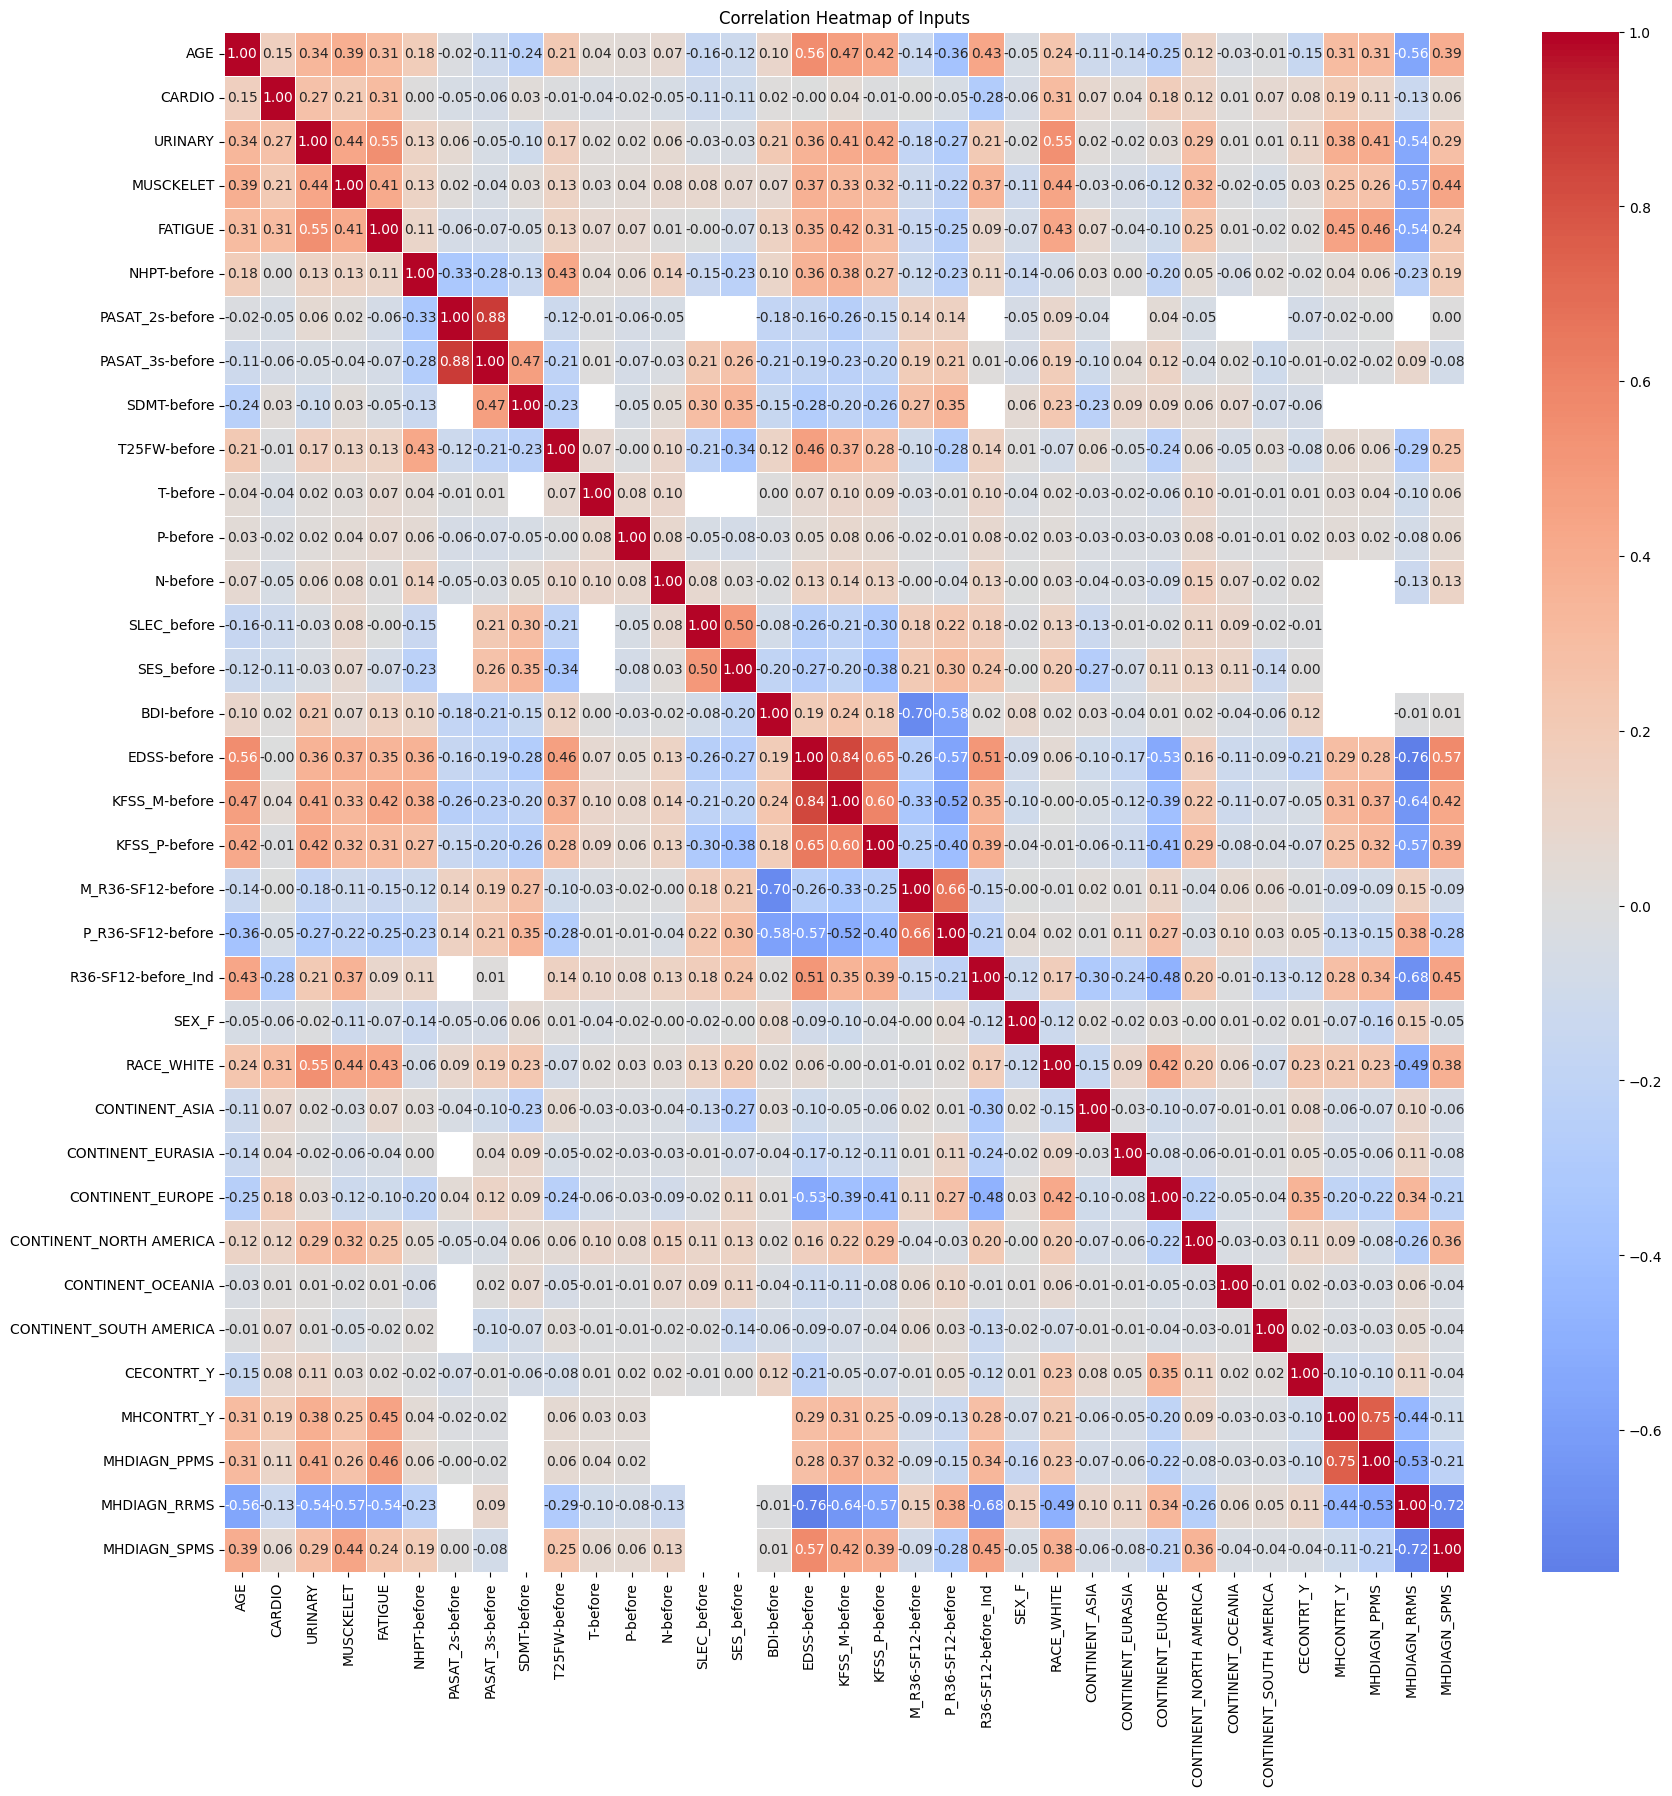

In [71]:
correlation_matrix_inputs = inputs.corr()

# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_inputs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap of Inputs')
plt.show()

add correlation between missingness too!